In [1]:
from deeplearning.instances.bindenergypredict.bindenergypredict import BindEnergyPredict

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../DATA_FILES/binding_energy_data_2020.csv')

In [4]:
Z_datas = np.array(df["Z"]).reshape(-1, 1)
N_datas = np.array(df["N"]).reshape(-1, 1)
A_datas = np.array(df["A"]).reshape(-1, 1)

In [5]:
x_datas = np.concatenate((Z_datas, N_datas, A_datas), axis=1)
print(x_datas.shape)

(2471, 3)


In [6]:
y_datas = np.array(df["binding_energy"])

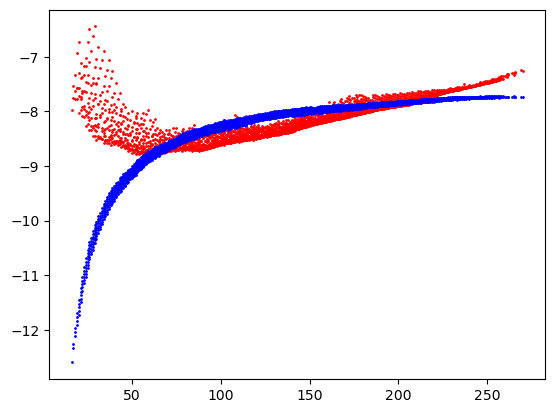

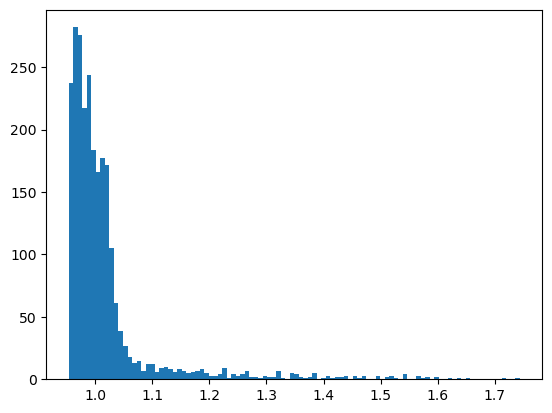

In [7]:
from sklearn.linear_model import LinearRegression
cl = BindEnergyPredict(x_datas, y_datas, LinearRegression())
cl.draw_2d()

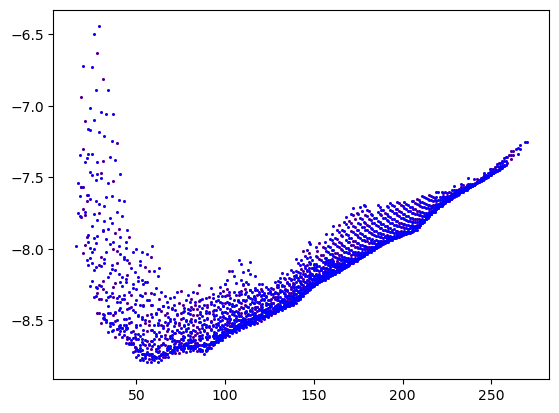

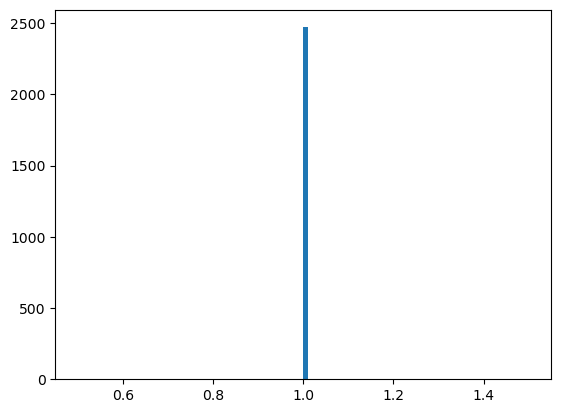

In [8]:
from sklearn.tree import DecisionTreeRegressor

cl = BindEnergyPredict(x_datas, y_datas, DecisionTreeRegressor())
cl.draw_2d()

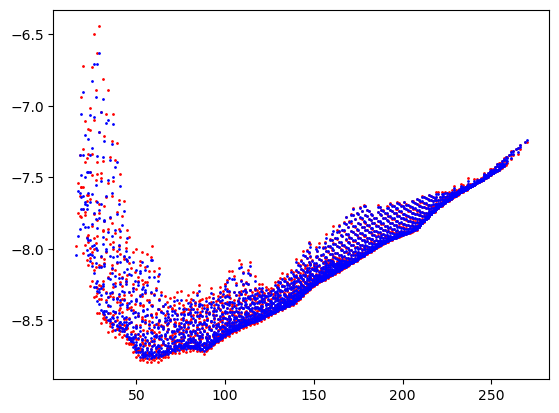

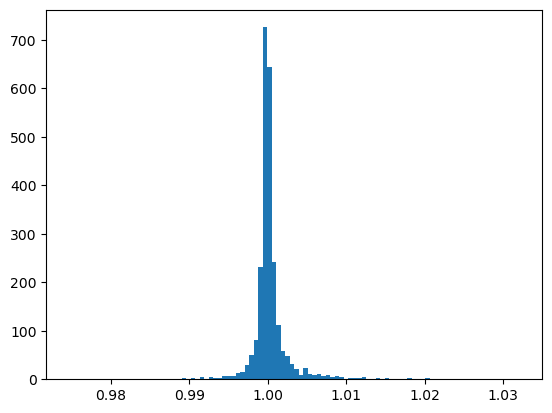

In [9]:
from sklearn.ensemble import RandomForestRegressor
cl = BindEnergyPredict(x_datas, y_datas, RandomForestRegressor())
cl.draw_2d()